The goal is to perform DBSCAN across many epsilons for 1 system dataset (eg, demand_data.csv, fuels.csv, ...), identify similar consecutive hours, merge consecutive similar hours into new timeseries files, and save the newly generated time series data 


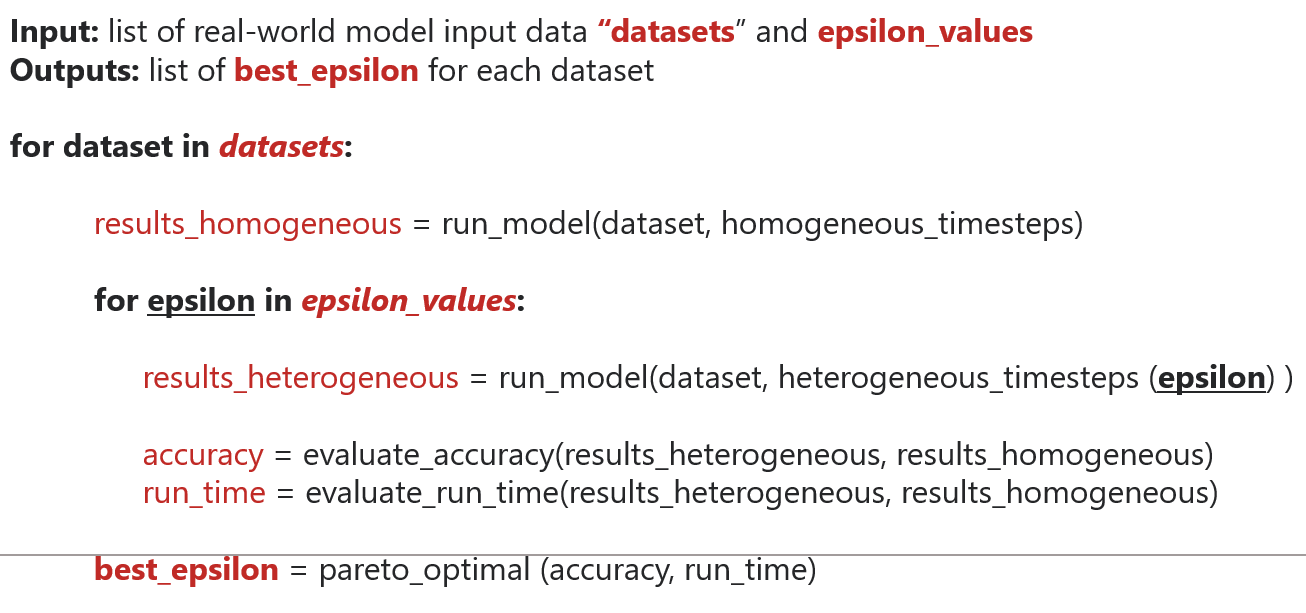


- Expected Output:
  - Set of folders ending with the corresponding epsilon saved containing many csv files

# 1. Load HO data and input data(epsilons to test)

In [1]:
#Input Data
path = r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\system"
# epsilon_values = [1.        , 0.98990909, 0.97981818, 0.96972727, 0.95963636, 
#  0.94954545, 0.93945455, 0.92936364, 0.91927273, 0.90918182, 
#  0.89909091, 0.889     , 0.87890909, 0.86881818, 0.85872727, 
#  0.84863636, 0.83854545, 0.82845455, 0.81836364, 0.80827273, 
#  0.79818182, 0.78809091, 0.778     , 0.76790909, 0.75781818, 
#  0.74772727, 0.73763636, 0.72754545, 0.71745455, 0.70736364, 
#  0.69727273, 0.68718182, 0.67709091, 0.667     , 0.65690909, 
#  0.64681818, 0.63672727, 0.62663636, 0.61654545, 0.60645455, 
#  0.59636364, 0.58627273, 0.57618182, 0.56609091, 0.556     , 
#  0.54590909, 0.53581818, 0.52572727, 0.51563636, 0.50554545, 
#  0.49545455, 0.48536364, 0.47527273, 0.46518182, 0.45509091, 
#  0.445     , 0.43490909, 0.42481818, 0.41472727, 0.40463636, 
#  0.39454545, 0.38445455, 0.37436364, 0.36427273, 0.35418182, 
#  0.34409091, 0.334     , 0.32390909, 0.31381818, 0.30372727, 
#  0.29363636, 0.28354545, 0.27345455, 0.26336364, 0.25327273, 
#  0.24318182, 0.23309091, 0.223     , 0.21290909, 0.20281818, 
#  0.19272727, 0.18263636, 0.17254545, 0.16245455, 0.15236364, 
#  0.14227273, 0.13218182, 0.12209091, 0.112     , 0.10190909, 
#  0.09181818, 0.08172727, 0.07163636, 0.06154545, 0.05145455, 
#  0.04136364, 0.03127273, 0.02118182, 0.01109091, 0.001     ]

# epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.9824893 , 1.        ]

# epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.01944744, 0.02559659,
#        0.03174574, 0.03789489, 0.04404403, 0.05019318, 0.05634233,
#        0.06249148, 0.06864062, 0.07478977, 0.08093892, 0.08708807,
#        0.09323721, 0.09938636, 0.10553551, 0.11168466, 0.11783381,
#        0.12398295, 0.1301321 , 0.13628125, 0.1424304 , 0.14857954,
#        0.15472869, 0.16087784, 0.16702699, 0.17317613, 0.17932528,
#        0.18547443, 0.19162358, 0.19777273, 0.20392187, 0.21007102,
#        0.21622017, 0.22236932, 0.22851846, 0.23466761, 0.24081676,
#        0.24696591, 0.25311505, 0.2592642 , 0.26541335, 0.2715625 ,
#        0.27771164, 0.28386079, 0.29000994, 0.29615909, 0.30230824,
#        0.30845738, 0.31460653, 0.32075568, 0.32690483, 0.33305397,
#        0.33920312, 0.34535227, 0.35150142, 0.35765056, 0.36379971,
#        0.36994886, 0.37609801, 0.38224715, 0.3883963 , 0.39454545,
#        0.40463636, 0.42214706, 0.43965775, 0.45716845, 0.47467914,
#        0.49218984, 0.50970053, 0.52721123, 0.54472192, 0.56223262,
#        0.57974331, 0.59725401, 0.6147647 , 0.6322754 , 0.64978609,
#        0.66729679, 0.68480748, 0.70231818, 0.71982888, 0.73733957,
#        0.75485027, 0.77236096, 0.78987166, 0.80738235, 0.82489305,
#        0.84240374, 0.85991444, 0.87742513, 0.89493583, 0.91244652,
#        0.92995722, 0.94746791, 0.96497861, 0.9824893 , 1.        ]

epsilon_values = [0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
       0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
       0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
       0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
       0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
       0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
       0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import os
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import itertools
import shutil

In [3]:
p_demand = "Demand_data.csv"
p_fuel = "Fuels_data.csv"
p_CF = "Generators_variability.csv"
p_network = "Network.csv"

path_demand = os.path.join(path, p_demand)
path_fuel = os.path.join(path, p_fuel)
path_CF = os.path.join(path, p_CF)
path_network = os.path.join(path, p_network)

df_demand = pd.read_csv(path_demand)
df_fuel = pd.read_csv(path_fuel)
df_CF = pd.read_csv(path_CF)

In [4]:
selected_demand_columns = [col for col in df_demand.columns if (col.startswith("Demand") or col == "Time_Index") and (col != "Demand_Segment")]
selected_fuel_columns = [col for col in df_fuel.columns if ((col != "Time_Index") and (col!="None"))]
selected_CF_columns = [col for col in df_CF.columns if (col != "Time_Index") and (col!="None")]


df_demand_values = df_demand[selected_demand_columns]
df_fuel_values = df_fuel[selected_fuel_columns].drop(index=0).reset_index().drop(columns=["index"])
df_CF_values = df_CF[selected_CF_columns]

df_tot = pd.concat([df_demand_values, df_fuel_values , df_CF_values], axis=1)
df_tot.head(3)

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery
0,1,7850,2242,1070,5.45,5.45,5.28,1,0.0,1,0.569945,0.0,1,0.920104,1,1,1
1,2,7424,2120,1012,5.45,5.45,5.28,1,0.0,1,0.623259,0.0,1,0.882234,1,1,1
2,3,7107,2029,969,5.45,5.45,5.28,1,0.0,1,0.694188,0.0,1,0.895074,1,1,1


# 2. Run DBSCAN for varying epsilons

In [5]:
# Normalize the data excluding the 'Time_Index' column
scaler = StandardScaler()
df_tot_normalized = scaler.fit_transform(df_tot.drop(columns=['Time_Index']))
df_tot_normalized_df = pd.DataFrame(df_tot_normalized, columns=df_tot.columns.drop('Time_Index'))

# Initialize list to store major results for each epsilon
epsilon_main_clustering_results = []

# Save unnormalized data with it's corresponding cluster attribution for each epsilon
df_tot_eps = {}
size_set_consecutive_indices ={} 

# First pass to find global axis limits for the x-axes
all_cluster_sizes = []
all_cluster_variances = []

for eps in epsilon_values:
    set_consecutive_indices_size_eps = []
    row_indexes_to_drop = []

    ## Step 0: Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(df_tot_normalized)

    ## Step 1: Save clustering results for further analysis if needed, before input data manipulation using clustering results
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()
    df_epsilon['Cluster'] = labels

    #Save cluster assignment in unnormalized data
    df_tot['Cluster'] = labels
    df_tot["Rel_TimeStep"] = 1
    df_tot_eps[eps] = df_tot.copy()
    df_tot.drop(columns=['Cluster', 'Rel_TimeStep'], inplace=True)
    
    # Collect cluster sizes and variance of the NORMALIZED DATA within each cluster
    cluster_sizes = df_epsilon[df_epsilon['Cluster'] != -1]['Cluster'].value_counts()
    cluster_variances = df_epsilon[df_epsilon['Cluster'] != -1].groupby('Cluster').var().mean(axis=1)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_variances.extend(cluster_variances)
    
    # Store the major clustering results for each DBSCAN run with different epsilons
    result = {
        'Epsilon': eps,
        'Num_Clusters': len(cluster_sizes),
        'Median_Cluster_Size': cluster_sizes.median()
    }
    epsilon_main_clustering_results.append(result)

    ## Step 2: Merge consecutive hours within the input data
    # Identify clusters with at least one consecutive pair of hours

    for label in set(labels):
        if label != -1:
            cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
            cluster_group = cluster_group.sort_values(by="Time_Index", ascending=True) #Make sure data is ordered in an ascending order based on the Time_Index value

            consecutive_indices_cluster = [] # cluster_groupAll sets of consecutive indices within the same cluster
            index_consecutive_indices_to_merge = [] # df_tot index of one set of consecutuve indices within the same cluster

            for i in range(len(cluster_group) - 1):
                if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                    consecutive_indices_cluster.append(cluster_group.index[i])
                    index_consecutive_indices_to_merge.append(cluster_group.iloc[i, :]["Time_Index"] - 1)

                    if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                        consecutive_indices_cluster.append(cluster_group.index[i+1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        index_consecutive_indices_to_merge = []

                    if i == len(cluster_group) - 2:
                        consecutive_indices_cluster.append(cluster_group.index[i + 1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        index_consecutive_indices_to_merge = []

    # Remove all rows that were replaced by the average value of the set of consecutive hours within the same cluster
    row_indexes_to_drop = list(itertools.chain(*row_indexes_to_drop))
    df_tot_eps[eps].drop(row_indexes_to_drop, inplace=True)

    # Reset "Time_Index" values
    df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)

    size_set_consecutive_indices[eps] = set_consecutive_indices_size_eps

c:\Users\Diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Diego\AppData\Local\Temp\ipykernel_19000\1798318784.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7251.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_19000\1798318784.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a

## 3. Save the results

In [23]:
selected_demand_columns.append("Rel_TimeStep")
df_demand_core = df_demand[df_demand.columns.difference(selected_demand_columns)]

selected_fuel_columns.append("Time_Index")
df_fuel_core = df_fuel.iloc[:1]

selected_CF_columns.append("Time_Index")

for eps in epsilon_values:
    ## Step 1: Save modified date under the same format as the original df
    #Demand.csv
    df_demand_modified = df_tot_eps[eps][selected_demand_columns].reset_index(drop=True)
    df_demand_eps = pd.concat([df_demand_core, df_demand_modified], axis=1)

    #Fuel.csv
    df_fuel_modified = df_tot_eps[eps][selected_fuel_columns]
    df_fuel_modified.index = df_fuel_modified.reset_index(drop=True).index +1
    df_fuel_eps = pd.concat([df_fuel_core, df_fuel_modified]).drop("None", axis=1)

    # Generators_variability.csv
    df_CF_eps = df_tot_eps[eps][selected_CF_columns].reset_index(drop=True)

    ## Step 2: Create a directory and save the data
    path_eps = path + "_epsilon_" +str(eps)
    os.makedirs(path_eps, exist_ok=True)

    # Save the DataFrame as a CSV file in the directory
    path_demand_eps = os.path.join(path_eps, "Demand_data.csv")
    path_fuel_eps = os.path.join(path_eps, "Fuels_data.csv")
    path_CF_eps = os.path.join(path_eps, "Generators_variability.csv")
    path_network_eps = os.path.join(path_eps, "Network.csv")

    df_demand_eps.to_csv(path_demand_eps, index=False)
    df_fuel_eps.to_csv(path_fuel_eps, index=False)
    df_CF_eps.to_csv(path_CF_eps, index=False)
    if os.path.isfile(path_network):
        shutil.copy(path_network, path_network_eps)

# 4. Across various systems in 1 run 

In [27]:
system_paths =[ 
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\system",
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\2_three_zones_w_electrolyzer\system",
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\3_three_zones_w_co2_capture\system",
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\4_three_zones_w_policies_slack\system",
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\5_three_zones_w_piecewise_fuel\system",
    # r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\7_three_zones_w_colocated_VRE_storage\system",
]

epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.01944744, 0.02559659,
       0.03174574, 0.03789489, 0.04404403, 0.05019318, 0.05634233,
       0.06249148, 0.06864062, 0.07478977, 0.08093892, 0.08708807,
       0.09323721, 0.09938636, 0.10553551, 0.11168466, 0.11783381,
       0.12398295, 0.1301321 , 0.13628125, 0.1424304 , 0.14857954,
       0.15472869, 0.16087784, 0.16702699, 0.17317613, 0.17932528,
       0.18547443, 0.19162358, 0.19777273, 0.20392187, 0.21007102,
       0.21622017, 0.22236932, 0.22851846, 0.23466761, 0.24081676,
       0.24696591, 0.25311505, 0.2592642 , 0.26541335, 0.2715625 ,
       0.27771164, 0.28386079, 0.29000994, 0.29615909, 0.30230824,
       0.30845738, 0.31460653, 0.32075568, 0.32690483, 0.33305397,
       0.33920312, 0.34535227, 0.35150142, 0.35765056, 0.36379971,
       0.36994886, 0.37609801, 0.38224715, 0.3883963 , 0.39454545,
       0.40463636, 0.42214706, 0.43965775, 0.45716845, 0.47467914,
       0.49218984, 0.50970053, 0.52721123, 0.54472192, 0.56223262,
       0.57974331, 0.59725401, 0.6147647 , 0.6322754 , 0.64978609,
       0.66729679, 0.68480748, 0.70231818, 0.71982888, 0.73733957,
       0.75485027, 0.77236096, 0.78987166, 0.80738235, 0.82489305,
       0.84240374, 0.85991444, 0.87742513, 0.89493583, 0.91244652,
       0.92995722, 0.94746791, 0.96497861, 0.9824893 , 1.        ]


In [28]:
for path in system_paths:
    p_demand = "Demand_data.csv"
    p_fuel = "Fuels_data.csv"
    p_CF = "Generators_variability.csv"
    p_network = "Network.csv"

    path_demand = os.path.join(path, p_demand)
    path_fuel = os.path.join(path, p_fuel)
    path_CF = os.path.join(path, p_CF)
    path_network = os.path.join(path, p_network)

    df_demand = pd.read_csv(path_demand)
    df_fuel = pd.read_csv(path_fuel)
    df_CF = pd.read_csv(path_CF)

    selected_demand_columns = [col for col in df_demand.columns if (col.startswith("Demand") or col == "Time_Index") and (col != "Demand_Segment")]
    selected_fuel_columns = [col for col in df_fuel.columns if ((col != "Time_Index") and (col!="None"))]
    selected_CF_columns = [col for col in df_CF.columns if (col != "Time_Index") and (col!="None")]


    df_demand_values = df_demand[selected_demand_columns]
    df_fuel_values = df_fuel[selected_fuel_columns].drop(index=0).reset_index().drop(columns=["index"])
    df_CF_values = df_CF[selected_CF_columns]

    df_tot = pd.concat([df_demand_values, df_fuel_values , df_CF_values], axis=1)

    ## Run DBSCAN 
    # Normalize the data excluding the 'Time_Index' column
    scaler = StandardScaler()
    df_tot_normalized = scaler.fit_transform(df_tot.drop(columns=['Time_Index']))
    df_tot_normalized_df = pd.DataFrame(df_tot_normalized, columns=df_tot.columns.drop('Time_Index'))

    # Initialize list to store major results for each epsilon
    epsilon_main_clustering_results = []

    # Save unnormalized data with it's corresponding cluster attribution for each epsilon
    df_tot_eps = {}
    size_set_consecutive_indices ={} 

    # First pass to find global axis limits for the x-axes
    all_cluster_sizes = []
    all_cluster_variances = []

    for eps in epsilon_values:
        set_consecutive_indices_size_eps = []
        row_indexes_to_drop = []

        ## Step 0: Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=2)
        labels = dbscan.fit_predict(df_tot_normalized)

        ## Step 1: Save clustering results for further analysis if needed, before input data manipulation using clustering results
        # Create a DataFrame to store clustering results for this epsilon
        df_epsilon = df_tot_normalized_df.copy()
        df_epsilon['Cluster'] = labels

        #Save cluster assignment in unnormalized data
        df_tot['Cluster'] = labels
        df_tot["Rel_TimeStep"] = 1
        df_tot_eps[eps] = df_tot.copy()
        df_tot.drop(columns=['Cluster', 'Rel_TimeStep'], inplace=True)
        
        # Collect cluster sizes and variance of the NORMALIZED DATA within each cluster
        cluster_sizes = df_epsilon[df_epsilon['Cluster'] != -1]['Cluster'].value_counts()
        cluster_variances = df_epsilon[df_epsilon['Cluster'] != -1].groupby('Cluster').var().mean(axis=1)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_variances.extend(cluster_variances)
        
        # Store the major clustering results for each DBSCAN run with different epsilons
        result = {
            'Epsilon': eps,
            'Num_Clusters': len(cluster_sizes),
            'Median_Cluster_Size': cluster_sizes.median()
        }
        epsilon_main_clustering_results.append(result)

        ## Step 2: Merge consecutive hours within the input data
        # Identify clusters with at least one consecutive pair of hours

        for label in set(labels):
            if label != -1:
                cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
                cluster_group = cluster_group.sort_values(by="Time_Index", ascending=True) #Make sure data is ordered in an ascending order based on the Time_Index value

                consecutive_indices_cluster = [] # cluster_groupAll sets of consecutive indices within the same cluster
                index_consecutive_indices_to_merge = [] # df_tot index of one set of consecutuve indices within the same cluster

                for i in range(len(cluster_group) - 1):
                    if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                        consecutive_indices_cluster.append(cluster_group.index[i])
                        index_consecutive_indices_to_merge.append(cluster_group.iloc[i, :]["Time_Index"] - 1)

                        if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                            consecutive_indices_cluster.append(cluster_group.index[i+1])
                            index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                            set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                            # Replace data from sets of consecutive hours with average values
                            mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                            mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                            index_row_to_keep = index_consecutive_indices_to_merge[0]
                            df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                            #Update the list of rows to remove as these rows are replaced by the average values across them
                            index_row_to_remove = index_consecutive_indices_to_merge[1:]
                            row_indexes_to_drop.append(index_row_to_remove)

                            index_consecutive_indices_to_merge = []

                        if i == len(cluster_group) - 2:
                            consecutive_indices_cluster.append(cluster_group.index[i + 1])
                            index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                            set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                            # Replace data from sets of consecutive hours with average values
                            mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                            mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                            index_row_to_keep = index_consecutive_indices_to_merge[0]
                            df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                            #Update the list of rows to remove as these rows are replaced by the average values across them
                            index_row_to_remove = index_consecutive_indices_to_merge[1:]
                            row_indexes_to_drop.append(index_row_to_remove)

                            index_consecutive_indices_to_merge = []

        # Remove all rows that were replaced by the average value of the set of consecutive hours within the same cluster
        row_indexes_to_drop = list(itertools.chain(*row_indexes_to_drop))
        df_tot_eps[eps].drop(row_indexes_to_drop, inplace=True)

        # Reset "Time_Index" values
        df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)

        size_set_consecutive_indices[eps] = set_consecutive_indices_size_eps

        if "Rel_TimeStep" not in selected_demand_columns:
            selected_demand_columns.append("Rel_TimeStep")

    ### Save results    
    df_demand_core = df_demand[df_demand.columns.difference(selected_demand_columns)]

    selected_fuel_columns.append("Time_Index")
    df_fuel_core = df_fuel.iloc[:1]

    selected_CF_columns.append("Time_Index")

    for eps in epsilon_values:
        ## Step 1: Save modified date under the same format as the original df
        #Demand.csv
        df_demand_modified = df_tot_eps[eps][selected_demand_columns].reset_index(drop=True)
        df_demand_eps = pd.concat([df_demand_core, df_demand_modified], axis=1)

        #Fuel.csv
        df_fuel_modified = df_tot_eps[eps][selected_fuel_columns]
        df_fuel_modified.index = df_fuel_modified.reset_index(drop=True).index +1
        df_fuel_eps = pd.concat([df_fuel_core, df_fuel_modified]).drop("None", axis=1)

        # Generators_variability.csv
        df_CF_eps = df_tot_eps[eps][selected_CF_columns].reset_index(drop=True)

        ## Step 2: Create a directory and save the data
        path_eps = path + "_epsilon_" +str(eps)
        os.makedirs(path_eps, exist_ok=True)

        # Save the DataFrame as a CSV file in the directory
        path_demand_eps = os.path.join(path_eps, "Demand_data.csv")
        path_fuel_eps = os.path.join(path_eps, "Fuels_data.csv")
        path_CF_eps = os.path.join(path_eps, "Generators_variability.csv")
        path_network_eps = os.path.join(path_eps, "Network.csv")

        df_demand_eps.to_csv(path_demand_eps, index=False)
        df_fuel_eps.to_csv(path_fuel_eps, index=False)
        df_CF_eps.to_csv(path_CF_eps, index=False)
        if os.path.isfile(path_network):
            shutil.copy(path_network, path_network_eps)

        

C:\Users\Diego\AppData\Local\Temp\ipykernel_2456\3101285996.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7251.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_2456\3101285996.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5101.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_2456\3101285996.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1456.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C

# Appendix: Other analysis 

IndexError: index 5 is out of bounds for axis 0 with size 5

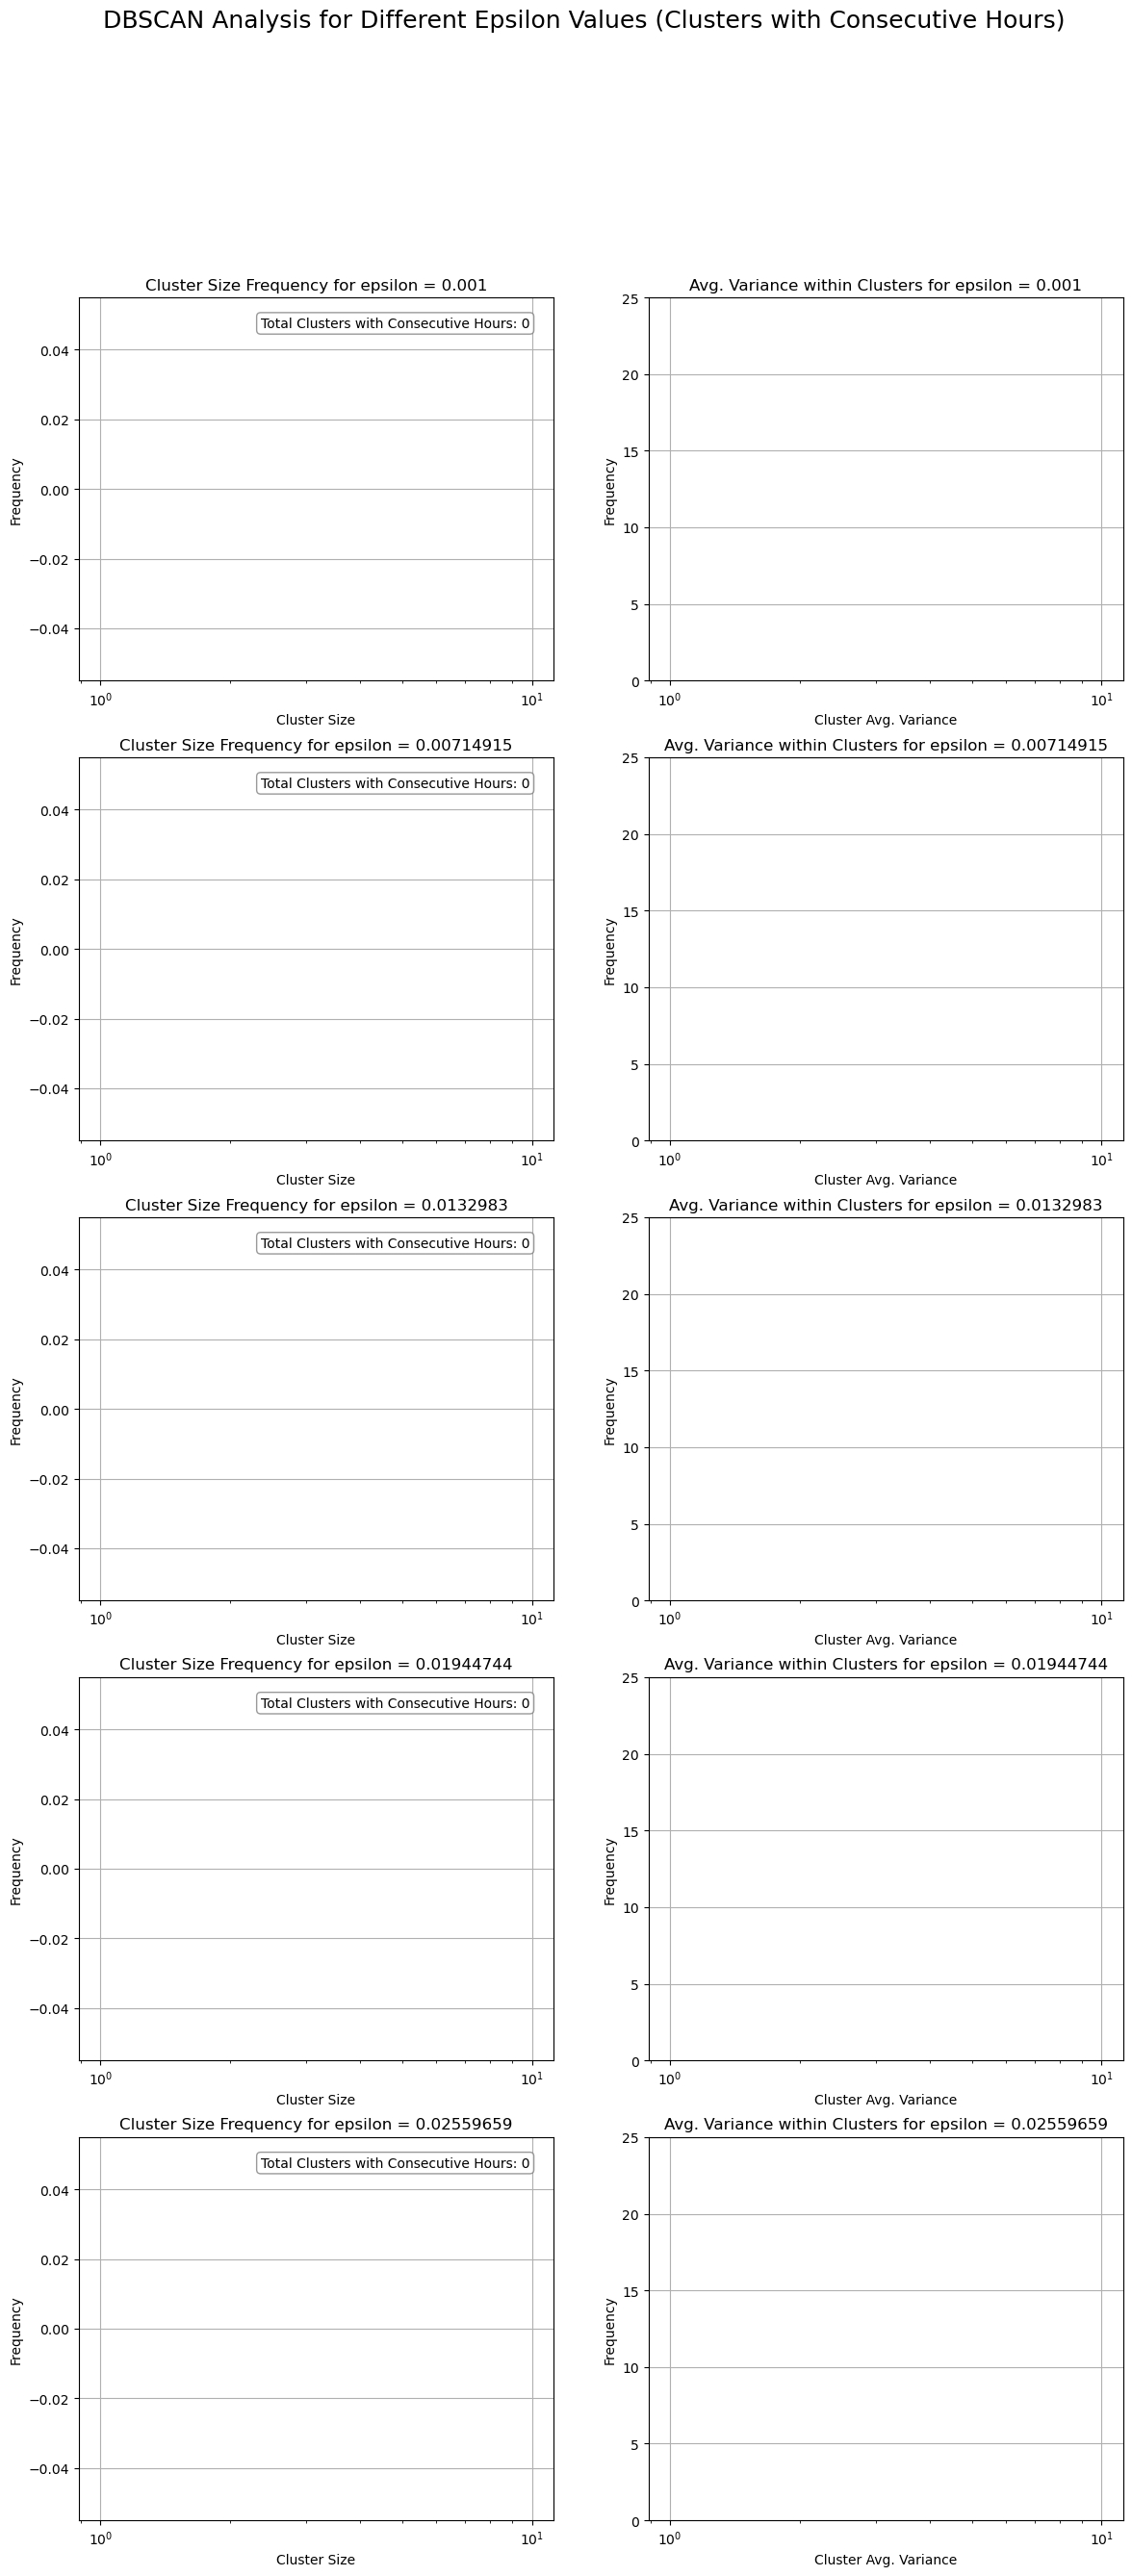

In [29]:
## Intermediary Step: Plot the resulting clustering results, focussing on cluster containing consecutive indices that could be merged
# # Initialize list to store results and DataFrames for each epsilon
epsilon_results = []
consecutive_hours_dfs = {}

# Prepare the figure with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 30))
fig.suptitle('DBSCAN Analysis for Different Epsilon Values (Clusters with Consecutive Hours)', fontsize=18)

# Define a common y-axis limit for variance plots on the right
common_y_axis_limit = [0, 25]

for idx, eps in enumerate(epsilon_values):
    labels = df_tot_eps[eps]['Cluster']
    
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()
    df_epsilon['Cluster'] = labels
    
    # Identify clusters with at least one consecutive pair of hours
    clusters_with_consec_h = []
    consecutive_rows = []
    for label in set(labels):
        if label != -1:
            cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
            consecutive_indices = []

            for i in range(len(cluster_group) - 1):
                if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                    consecutive_indices.append(cluster_group.index[i])
                    if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                        consecutive_indices.append(cluster_group.index[i+1])

                    if i == len(cluster_group) - 2:
                        consecutive_indices.append(cluster_group.index[i + 1])

            if consecutive_indices:
                clusters_with_consec_h.append(label)
                consecutive_rows.extend(consecutive_indices)

    df_consecutive = df_tot_eps[eps].loc[consecutive_rows].copy()
    consecutive_hours_dfs[eps] = df_consecutive

    df_epsilon_cluster_w_consec_h = df_epsilon[df_epsilon['Cluster'].isin(clusters_with_consec_h)]
    cluster_sizes = df_epsilon_cluster_w_consec_h['Cluster'].value_counts()
    cluster_variances = df_epsilon_cluster_w_consec_h.groupby('Cluster').var().mean(axis=1)

    # Plot Cluster Size Frequency
    sns.histplot(cluster_sizes, kde=False, bins=35, ax=axes[idx, 0], log_scale=(True, False))
    axes[idx, 0].set_title(f'Cluster Size Frequency for epsilon = {eps}', fontsize=12)
    axes[idx, 0].set_xlabel('Cluster Size')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(True)
    total_clusters = len(cluster_sizes)
    axes[idx, 0].text(
        0.95, 0.95,
        f'Total Clusters with Consecutive Hours: {total_clusters}',
        transform=axes[idx, 0].transAxes,
        fontsize=10,
        color='black',
        ha='right',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )

    # Plot Cluster Variance Frequency with a fixed y-axis limit
    sns.histplot(cluster_variances, kde=False, bins=35, ax=axes[idx, 1], log_scale=(True, False))
    axes[idx, 1].set_title(f'Avg. Variance within Clusters for epsilon = {eps}', fontsize=12)
    axes[idx, 1].set_xlabel('Cluster Avg. Variance')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].set_ylim(common_y_axis_limit)  # Set the common y-axis limit here
    axes[idx, 1].grid(True)

    # Store the results for each epsilon
    result = {
        'Epsilon': eps,
        'Num_Clusters_With_Consecutive_Hours': len(cluster_sizes),
        'Mean_Cluster_Variance': cluster_variances.mean()
    }
    epsilon_results.append(result)

# Adjust layout and show the figure
plt.tight_layout(rect=[0, 0, 1, 0.97])